In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline


Read and describe data

In [25]:
df = pd.read_csv('teleCust1000t.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.8 KB


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [26]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

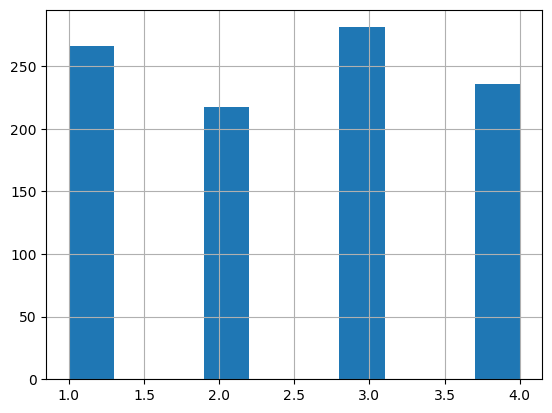

In [28]:
df['custcat'].hist()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside']].values
Y=df[[ 'custcat']].values

Splitting data into train and test datasets

In [31]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


In [32]:
from sklearn.neighbors import KNeighborsClassifier

Use different K_neigbors vaules for training KNN without Normalization

In [33]:
k1=4
k2=10
k3=15

model1=KNeighborsClassifier(n_neighbors= k1).fit(X_train,y_train)
model2=KNeighborsClassifier(n_neighbors= k2).fit(X_train,y_train)
model3=KNeighborsClassifier(n_neighbors= k3).fit(X_train,y_train)

model1
model2
model3


/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [34]:
from sklearn import metrics
yhat1 = model1.predict(X_test)
print("model1:Train set Accuracy: ", metrics.accuracy_score(y_train, model1.predict(X_train)))
print("model1:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

yhat2 = model2.predict(X_test)
print("model2:Train set Accuracy: ", metrics.accuracy_score(y_train, model1.predict(X_train)))
print("model2:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

yhat3 = model3.predict(X_test)
print("model3:Train set Accuracy: ", metrics.accuracy_score(y_train, model1.predict(X_train)))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))


model1:Train set Accuracy:  0.5575
model1:Test set Accuracy:  0.26
model2:Train set Accuracy:  0.5575
model2:Test set Accuracy:  0.32
model3:Train set Accuracy:  0.5575
model3:Test set Accuracy:  0.355


Use different K_neigbors vaules for training KNN with Normalization

In [35]:
k1=4
k2=10
k3=15
X_train_norm =preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test_norm = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
model1_norm=KNeighborsClassifier(n_neighbors= k1).fit(X_train_norm,y_train)
model2_norm=KNeighborsClassifier(n_neighbors= k2).fit(X_train_norm,y_train)
model3_norm=KNeighborsClassifier(n_neighbors= k3).fit(X_train_norm,y_train)

model1_norm
model2_norm
model3_norm
yhat1 = model1_norm.predict(X_test_norm)
print("model1:Train set Accuracy: ", metrics.accuracy_score(y_train, model1_norm.predict(X_train_norm)))
print("model1:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat1))

yhat2 = model2_norm.predict(X_test_norm)
print("model2:Train set Accuracy: ", metrics.accuracy_score(y_train, model1_norm.predict(X_train_norm)))
print("model2:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat2))

yhat3 = model3_norm.predict(X_test_norm)
print("model3:Train set Accuracy: ", metrics.accuracy_score(y_train, model1_norm.predict(X_train_norm)))
print("model3:Test set Accuracy: ", metrics.accuracy_score(y_test, yhat3))


/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


model1:Train set Accuracy:  0.5475
model1:Test set Accuracy:  0.33
model2:Train set Accuracy:  0.5475
model2:Test set Accuracy:  0.345
model3:Train set Accuracy:  0.5475
model3:Test set Accuracy:  0.325
